In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('./train.csv')

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train_df['datetime'] = pd.to_datetime(train_df['datetime'])

In [5]:
train_df['year'] = train_df['datetime'].dt.year
train_df['month'] = train_df['datetime'].dt.month
train_df['day'] = train_df['datetime'].dt.day
train_df['hour'] = train_df['datetime'].dt.hour
train_df['minute']  = train_df['datetime'].dt.minute
train_df['second']  = train_df['datetime'].dt.second

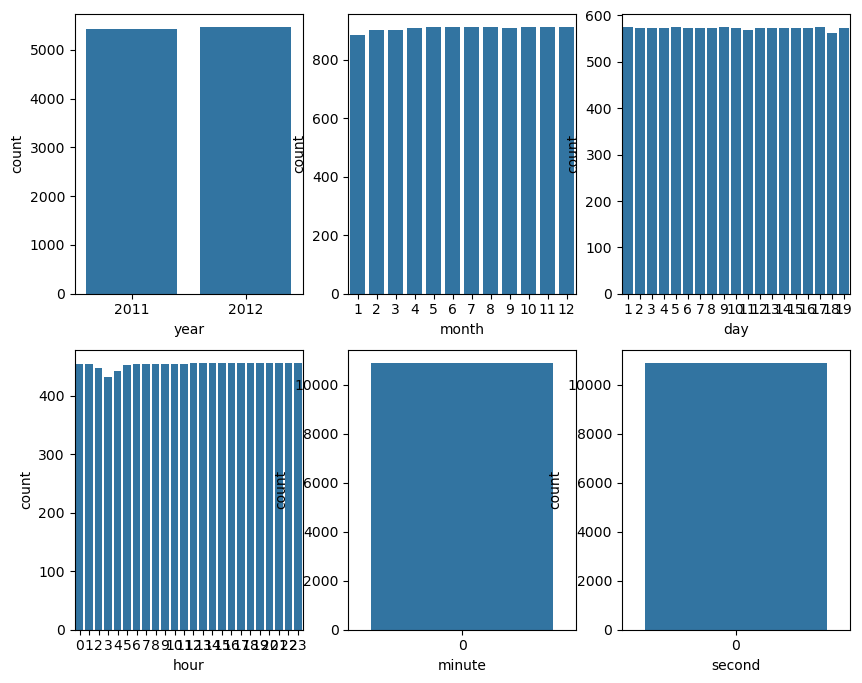

In [6]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
sns.countplot(x=train_df['year'])

plt.subplot(2, 3, 2)
sns.countplot(x=train_df['month'])

plt.subplot(2, 3, 3)
sns.countplot(x=train_df['day'])

plt.subplot(2, 3, 4)
sns.countplot(x=train_df['hour'])

plt.subplot(2, 3, 5)
sns.countplot(x=train_df['minute'])

plt.subplot(2, 3, 6)
sns.countplot(x=train_df['second'])

plt.show()

In [ ]:
from sklearn.model_selection import  train_test_split

feature = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed','year', 'month', 'day', 'hour', 'minute', 'second']
X = train_df[feature]
y = train_df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

mse = mean_squared_error(y_test, pred)
rmse = mse ** 0.5

정답 :  [248.10627003  48.79765547 200.90676727 ... 309.7528022   38.17030198
 243.62697388]
mse: 19945.37005375345, rmse: 141.22807813516917


In [13]:
pd.DataFrame(pred, columns=['count'])

,count
0,248.106270
1,48.797655
2,200.906767
3,292.785832
4,388.486548
...,...
2173,224.130198
2174,68.593142
2175,309.752802
2176,38.170302


In [14]:
print(f'모델의 손실함수 값 -> mse: {mse}, rmse: {rmse}')

모델의 손실함수 값 -> mse: 19945.37005375345, rmse: 141.22807813516917


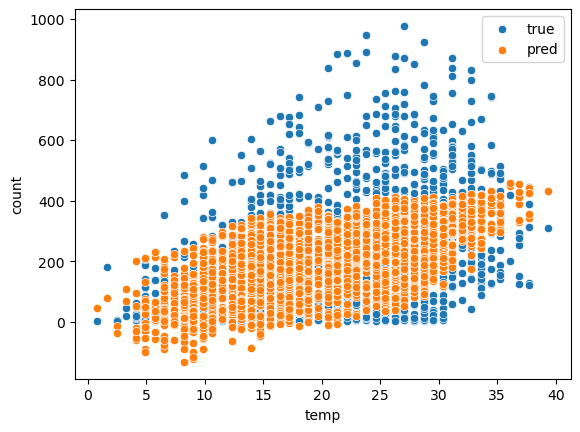

In [9]:
sns.scatterplot(x=X_test['temp'], y=y_test, label='true')
sns.scatterplot(x=X_test['temp'], y=pred, label='pred')
plt.show()

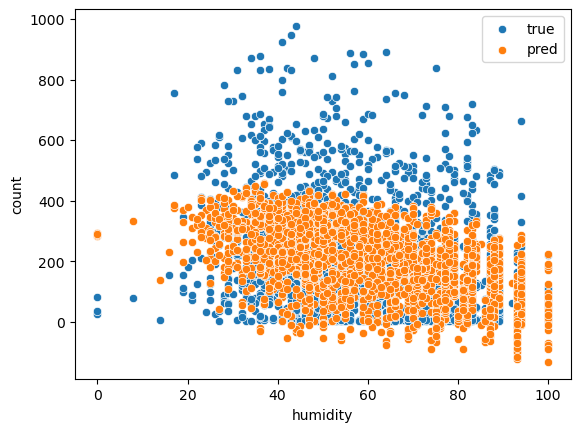

In [10]:
sns.scatterplot(x=X_test['humidity'], y=y_test, label='true')
sns.scatterplot(x=X_test['humidity'], y=pred, label='pred')
plt.show()